In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model 

In [5]:
df = pd.read_csv("homeprices.csv")
df

,area,price
0,2600,550000
1,3000,565000
2,3200,610000
3,3600,680000
4,4000,725000


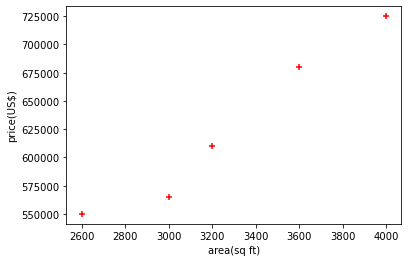

In [6]:
%matplotlib inline
plt.xlabel('area(sq ft)')
plt.ylabel('price(US$)')
plt.scatter(df.area,df.price,color='red',marker='+')

In [7]:
new_df = df.drop('price',axis='columns')
new_df

,area
0,2600
1,3000
2,3200
3,3600
4,4000


In [8]:
price = df.price
price

0    550000
1    565000
2    610000
3    680000
4    725000
Name: price, dtype: int64

In [9]:
model = linear_model.LinearRegression()
model.fit(new_df,price)

LinearRegression()

In [10]:
model.predict([[3300]])

array([628715.75342466])

In [15]:
model.coef_

array([135.78767123])

In [16]:
model.intercept_

180616.43835616432

In [17]:
model.predict([[5500]])

array([927448.63013699])

NameError: name 'reg' is not defined

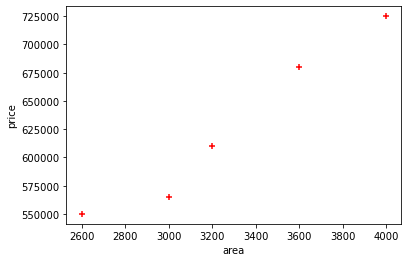

In [18]:
%matplotlib inline
plt.xlabel('area')
plt.ylabel('price')
plt.scatter(df.area,df.price,color='red',marker='+')
plt.plot(df.area,reg.predict(df[['area']]),color='blue')

In [20]:
d = pd.read_csv("areas.csv")
d.head(3)

,area
0,1000
1,1500
2,2300


In [21]:
p = model.predict(d)

In [22]:
d['prices'] = p

In [23]:
d.to_csv("prediction.csv",index=False)

# Exercise

d1 = pd.read_csv("canada_per_capita_income.csv")
d1.head(3)

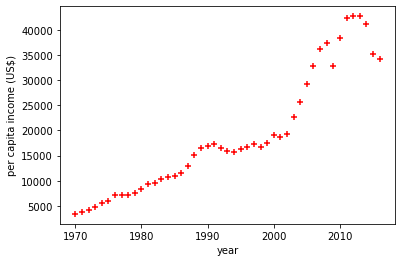

In [57]:
%matplotlib inline
plt.xlabel('year')
plt.ylabel('per capita income (US$)')
plt.scatter(d1.year,d1.per_capita_income,color='red',marker='+')

In [58]:
new_d1_year = d1.drop("per_capita_income",axis='columns')
new_d1_year.head(3)

,year
0,1970
1,1971
2,1972


In [59]:

income = d1.drop("year",axis='columns')
income.head(3)

,per_capita_income
0,3399.299037
1,3768.297935
2,4251.175484


In [60]:
reg = linear_model.LinearRegression()
reg.fit(new_d1_year,income)

LinearRegression()

In [61]:
reg.predict([[2020]])

array([[41288.69409442]])

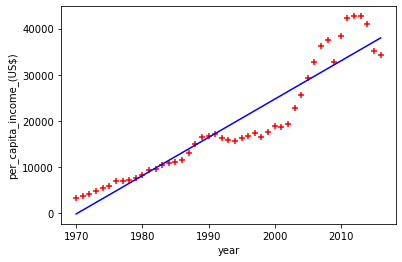

In [64]:
%matplotlib inline
plt.xlabel('year')
plt.ylabel('per_capita_income_(US$)')
plt.scatter(d1.year,d1.per_capita_income,color='red',marker='+')
plt.plot(d1.year,reg.predict(d1[['year']]),color='blue')

In [66]:
reg.coef_

array([[828.46507522]])

In [67]:
reg.intercept_

array([-1632210.75785546])

# save and load model


In [24]:
import pickle

In [26]:
with open('model_pickle','wb') as f:
    pickle.dump(model,f)

In [28]:
with open('model_pickle','rb') as f:
    mp = pickle.load(f)

In [31]:
mp.predict([[5000]])

array([859554.79452055])

# using Joblib

In [34]:
import joblib

In [36]:
joblib.dump(model,'model_joblib')

['model_joblib']

In [38]:
mj=joblib.load('model_joblib')

In [40]:
mj.predict([[5000]])

array([859554.79452055])